# 선형 회귀

In [3]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 
                        19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 
                        22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 
                        24.0, 24.0, 24.6, 25.0, 25.6, 26.5,	27.3, 27.5, 
                        27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                     	36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 
                        40.0, 40.0,	40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 
                         85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 
                         120.0, 130.0, 135.0, 110.0, 130.0,150.0, 145.0,
                         150.0, 170.0, 225.0, 145.0, 188.0, 180.0,197.0,
                         218.0,300.0, 260.0, 265.0, 250.0, 250.0, 300.0,
                         320.0, 514.0, 556.0, 840.0,685.0, 700.0, 700.0,
                         690.0, 900.0, 650.0, 820.0, 850.0, 900.0,
                         1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                         1000.0, 1000.0])


In [4]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 변견
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

print('50cm: ', knr.predict([[50]]))
print('100cm: ', knr.predict([[100]]))

50cm:  [1033.33333333]
100cm:  [1033.33333333]


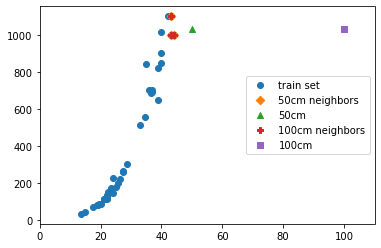

In [5]:
# 50cm, 100com 길이의 농어의 이웃 및 산점도 비교
import matplotlib.pyplot as plt
# 50cm 농어의 이웃을 구함
distance_50, indexes_50 = knr.kneighbors([[50]])
# 100cm 농어의 이웃을 구함
distance_100, indexes_100 = knr.kneighbors([[100]])

# 훈련 세트의 산점도
plt.scatter(train_input, train_target, label='train set')

# 훈련 세트 중에서 50cm 농어의 이웃 데이터만 다시 그림
plt.scatter(train_input[indexes_50], train_target[indexes_50],
           marker='D', label='50cm neighbors')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^', label='50cm')

# 훈련 세트 중에서 100cm 농어의 이웃 데이터만 다시 그림
plt.scatter(train_input[indexes_100], train_target[indexes_100],
           marker='P', label='100cm neighbors')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='s', label='100cm')
plt.xlim(0, 110)
plt.legend(loc=5)
plt.show()

In [6]:
# 훈련데이터에서 이웃 데이터의 인덱스 확인
print('50cm neighbor indexes: ', indexes_50)
print('100cm neighbor indexes: ', indexes_100)

50cm neighbor indexes:  [[34  8 14]]
100cm neighbor indexes:  [[34  8 14]]


In [7]:
# 이웃 데이터의 무게 평균 계산
print(np.mean(train_target[indexes_50]))
print(np.mean(train_target[indexes_100]))

1033.3333333333333
1033.3333333333333


In [17]:
# 훈련 데이터를 이용한 직선 방정식 구하기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)
# 50cm 농어에 대한 예측
print('50cm: ', lr.predict([[50]]))

# 기울기(a): coef_, 절편(bias): intercept_
print(lr.coef_, lr.intercept_)

50cm:  [1241.83860323]
[39.01714496] -709.0186449535477


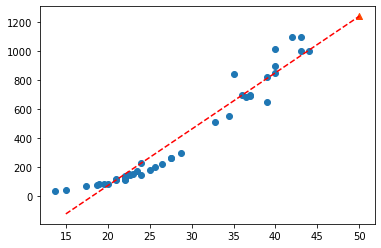

In [20]:
# 기울기와 절편을 이용한 1차 방정식 그래프
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프 그리기
# plot([x축 데이터: 시작 ,끝], [y축 데이터: 시작, 끝])
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_],
        color='red', linestyle='--')

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^', color='orangered')
plt.show()

In [21]:
print('train data score: ',
     lr.score(train_input, train_target))
print('test data score: ',
     lr.score(test_input, test_target))  # 과소 적합

train data score:  0.939846333997604
test data score:  0.8247503123313558


## 다항 회귀

In [22]:
# 훈련 세트에 데이터 추가
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly[0:5])
print(train_poly.shape, test_poly.shape)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
(42, 2) (14, 2)


In [23]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))  # 50cm 농어의 무게 예측
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278259


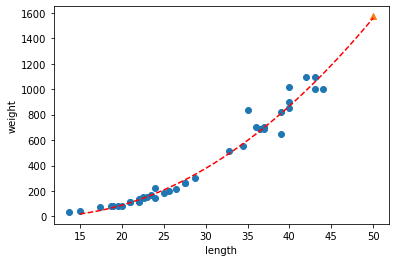

In [25]:
# 다항 회귀식을 이용한 그래프 그리기
# 구간별 직선을 그리기 위해 15에서 50까지 정수 배열을 만듦
point = np.arange(15, 51)
# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05,
        color='red', linestyle='--')
# 50cm 농어 데이터(무게:1574g)
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121
